In [1]:
import pandas as pd

# Load only a few rows (e.g., 10,000)
# df = pd.read_csv('VED_171101_week.csv', nrows=200000)
df = pd.read_csv('VED_171101_week.csv')

# View structure
print(df.shape)
df.head()


(489414, 22)


,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Air Conditioning Power[kW],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],HV Battery Voltage[V],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
0,1.586651,8,706,0,42.277558,-83.69875,40.0,22.129999,2285.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.586651,8,706,200,42.277558,-83.69875,40.0,22.129999,2285.0,67.450981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.586651,8,706,1100,42.277558,-83.69875,45.0,22.129999,2285.0,67.450981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.586651,8,706,2100,42.277558,-83.69875,47.0,6.150000,2744.0,67.450981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.586651,8,706,4200,42.277558,-83.69875,48.0,21.440001,1982.0,67.450981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
from datetime import datetime, timedelta

# Keep relevant columns
df = df[['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]', 'Longitude[deg]', 'Vehicle Speed[km/h]']]
df.columns = ['daynum', 'veh_id', 'trip', 'timestamp', 'lat', 'lon', 'speed']

# Convert to datetime
base_date = datetime(2017, 11, 1)
df['datetime'] = df['daynum'].apply(lambda x: base_date + timedelta(days=x)) + pd.to_timedelta(df['timestamp'], unit='ms')

# Extract hour & weekday
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()

# Drop NaNs
df.dropna(subset=['lat', 'lon', 'speed'], inplace=True)

print(df[['datetime', 'hour', 'weekday']].head())


                    datetime  hour   weekday
0 2017-11-02 14:04:46.663200    14  Thursday
1 2017-11-02 14:04:46.863200    14  Thursday
2 2017-11-02 14:04:47.763200    14  Thursday
3 2017-11-02 14:04:48.763200    14  Thursday
4 2017-11-02 14:04:50.863200    14  Thursday


In [3]:
df.head()

,daynum,veh_id,trip,timestamp,lat,lon,speed,datetime,hour,weekday
0,1.586651,8,706,0,42.277558,-83.69875,40.0,2017-11-02 14:04:46.663200,14,Thursday
1,1.586651,8,706,200,42.277558,-83.69875,40.0,2017-11-02 14:04:46.863200,14,Thursday
2,1.586651,8,706,1100,42.277558,-83.69875,45.0,2017-11-02 14:04:47.763200,14,Thursday
3,1.586651,8,706,2100,42.277558,-83.69875,47.0,2017-11-02 14:04:48.763200,14,Thursday
4,1.586651,8,706,4200,42.277558,-83.69875,48.0,2017-11-02 14:04:50.863200,14,Thursday


In [4]:
df.tail()

,daynum,veh_id,trip,timestamp,lat,lon,speed,datetime,hour,weekday
489409,7.992231,601,128,896900,42.288847,-83.753957,12.0,2017-11-09 00:03:45.666400,0,Thursday
489410,7.992231,601,128,897100,42.288847,-83.753957,18.0,2017-11-09 00:03:45.866400,0,Thursday
489411,7.992231,601,128,897900,42.288847,-83.753957,18.0,2017-11-09 00:03:46.666400,0,Thursday
489412,7.992231,601,128,898100,42.288847,-83.753957,24.0,2017-11-09 00:03:46.866400,0,Thursday
489413,7.992231,601,128,899500,42.288847,-83.753957,29.0,2017-11-09 00:03:48.266400,0,Thursday


In [22]:
pip install matplotlib seaborn

^C
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.1 MB 330.3 kB/s eta 0:00:25
     ---------------------------------------- 0.1/8.1 MB 656.4 kB/s eta 0:00:13
      --------------------------------------- 0.2/8.1 MB 1.1 MB/s eta 0:00:07
     - -------------------------------------- 0.2/8.1 MB 1.4 MB/s eta 0:00:06
     - -------------------------------------- 0.3/8.1 MB 1.4 MB/s eta 0:00:06
     - -------------------------------------- 0.4/8.1 MB 1.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/8.1 MB 1.6 MB/s eta 0:00:05
     --- ------------------------------------ 0.6/8.1 MB 1.8 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/8.1 MB 1.9 MB/s eta 0:00:04
     ---- ----------------------------------- 0.9/8.1 MB 2.0 MB/s eta 0:00:04
     ---- ----------------------------------- 1.0/8.1 MB 2.0 MB/s eta 0:00:04
     ----- ---------------------------------- 1.2/8.1 MB 2.2 MB/s e


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\rouna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\rouna\AppData\Local\Temp\ipykernel_18352\1636211257.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='mako')


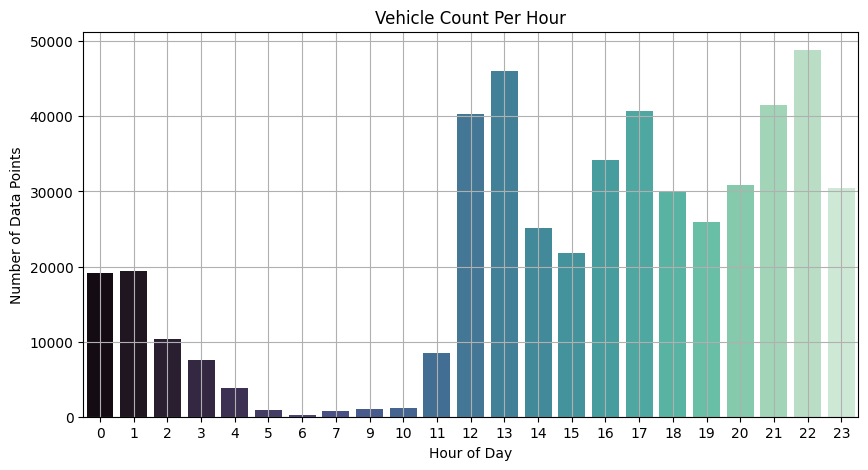

In [5]:
# Analyze Vehicle Count Per Hour

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df, palette='mako')
plt.title("Vehicle Count Per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Data Points")
plt.grid(True)
plt.show()


C:\Users\rouna\AppData\Local\Temp\ipykernel_18352\2845683627.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='speed', data=df, palette='Set3')


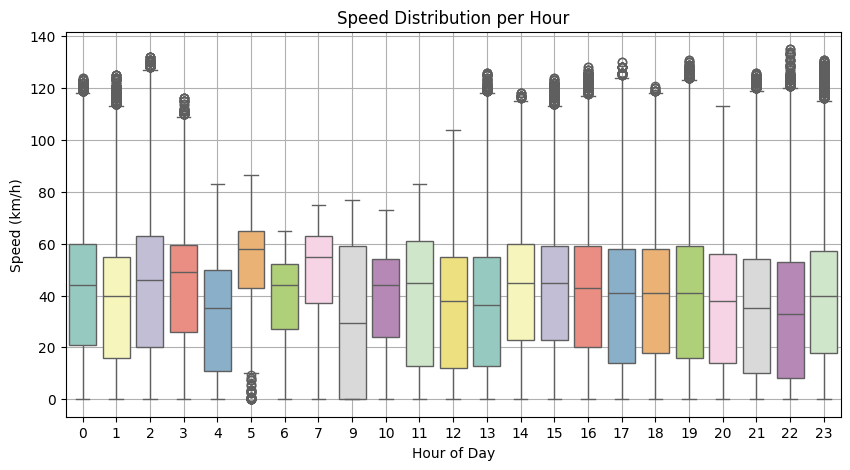

In [6]:
# Analyze Average Speed Per Hour

plt.figure(figsize=(10,5))
sns.boxplot(x='hour', y='speed', data=df, palette='Set3')
plt.title("Speed Distribution per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Speed (km/h)")
plt.grid(True)
plt.show()


In [7]:
#  Identify Congested Points

df['is_congested'] = df['speed'] < 10
congested_points = df[df['is_congested'] == True]
print("Total congested records:", len(congested_points))


Total congested records: 101103


In [27]:
pip install folium

     ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/113.4 kB 1.4 MB/s eta 0:00:01
     ---------- ---------------------------- 30.7/113.4 kB 1.4 MB/s eta 0:00:01
     -------------------------- ---------- 81.9/113.4 kB 573.4 kB/s eta 0:00:01
     ------------------------------------ 113.4/113.4 kB 599.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/90.4 kB ? eta -:--:--
     ------------------------------------ --- 81.9/90.4 kB 2.3 MB/s eta 0:00:01
     ---------------------------------------- 90.4/90.4 kB 1.7 MB/s eta 0:00:00
  Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\rouna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
# Plot Congestion Heatmap Using GPS

import folium
from folium.plugins import HeatMap

# Center map at average location
center = [df['lat'].mean(), df['lon'].mean()]
m = folium.Map(location=center, zoom_start=13)

# Add congestion points to heatmap
heat_data = congested_points[['lat', 'lon']].dropna().values.tolist()
HeatMap(heat_data, radius=7).add_to(m)

# Save to HTML file
m.save("congestion_heatmap.html")
print("Heatmap saved as congestion_heatmap.html")


Heatmap saved as congestion_heatmap.html


Text(0.5, 1.0, 'Congested Points per Hour (<10 km/h)')

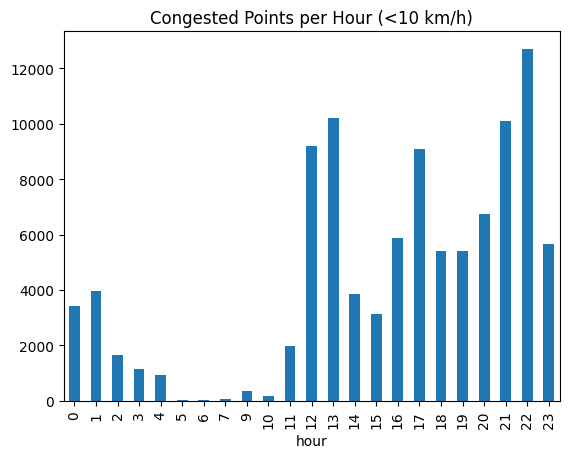

In [9]:
df[df['speed'] < 10]['hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Congested Points per Hour (<10 km/h)")


C:\Users\rouna\AppData\Local\Temp\ipykernel_18352\2469661148.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['datetime'].dt.floor('H').value_counts().sort_index().plot(kind='bar', figsize=(14,5))


Text(0.5, 1.0, 'Number of Records per Hour')

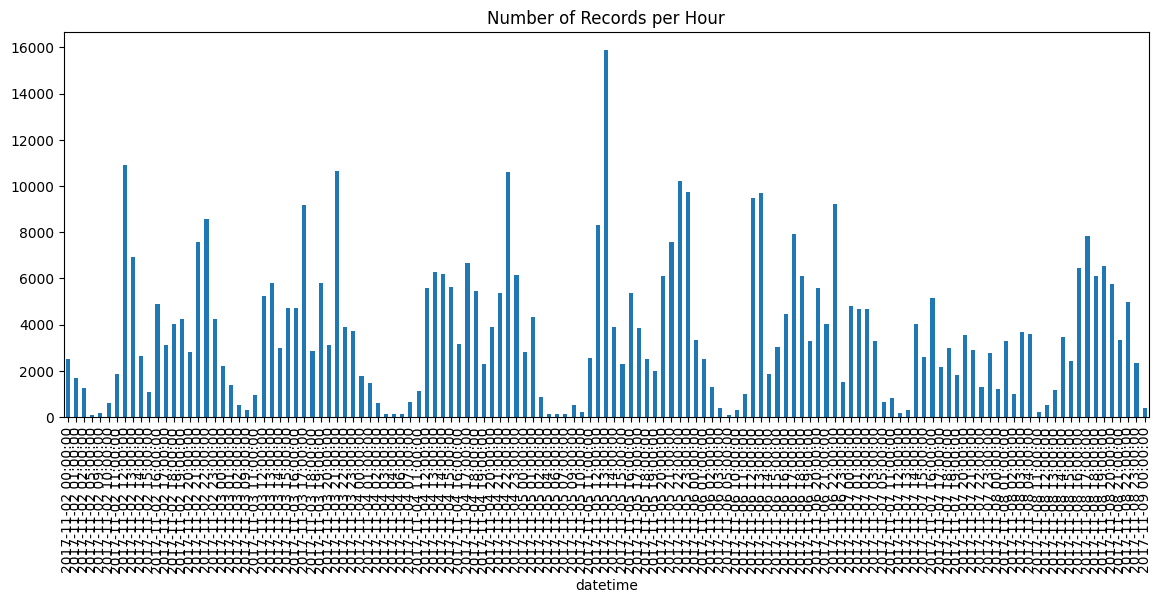

In [10]:
df['datetime'].dt.floor('H').value_counts().sort_index().plot(kind='bar', figsize=(14,5))
plt.title("Number of Records per Hour")


C:\Users\rouna\AppData\Local\Temp\ipykernel_18352\2054680407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekday', data=df, order=[


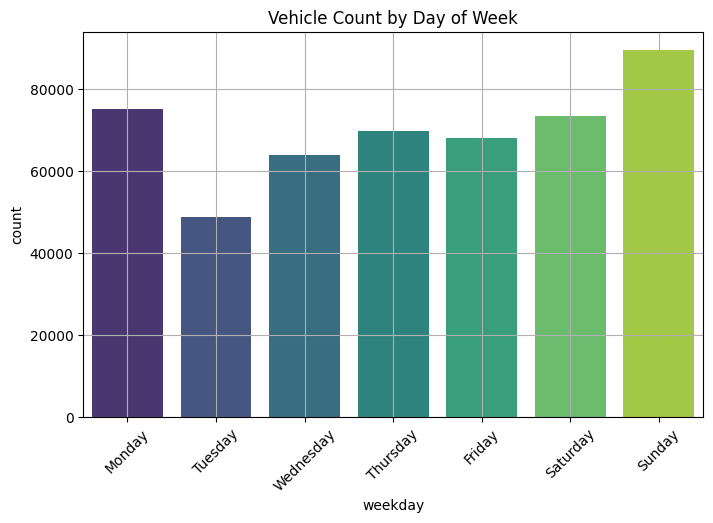

In [11]:
# Analyze Vehicle Count by Weekday

plt.figure(figsize=(8,5))
sns.countplot(x='weekday', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], palette='viridis')
plt.title("Vehicle Count by Day of Week")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [12]:
print("🔍 Traffic Pattern Summary:")
print(f"Total records: {len(df)}")
print(f"Total trips: {df['trip'].nunique()}")
print(f"Time range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Peak traffic hour (by volume): {df['hour'].mode()[0]}")
print(f"Total congested points (<10 km/h): {len(congested_points)}")


🔍 Traffic Pattern Summary:
Total records: 488657
Total trips: 656
Time range: 2017-11-02 00:04:13.838400 to 2017-11-09 00:03:48.266400
Peak traffic hour (by volume): 22
Total congested points (<10 km/h): 101103


In [61]:
import pandas as pd

# Define peak hours (customize if needed)
peak_hours = [12, 13, 17,21, 22]

# Create label column
df['is_peak'] = df['hour'].apply(lambda x: 1 if x in peak_hours else 0)

# Select features
features = df[['lat', 'lon', 'speed', 'hour']]
labels = df['is_peak']


In [38]:
pip install scikit-learn

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     --------------------------------------- 0.0/10.7 MB 435.7 kB/s eta 0:00:25
     --------------------------------------- 0.1/10.7 MB 653.6 kB/s eta 0:00:17
      --------------------------------------- 0.2/10.7 MB 1.4 MB/s eta 0:00:08
     - -------------------------------------- 0.3/10.7 MB 1.6 MB/s eta 0:00:07
     - -------------------------------------- 0.5/10.7 MB 2.1 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/10.7 MB 2.3 MB/s eta 0:00:05
     --- ------------------------------------ 0.8/10.7 MB 2.4 MB/s eta 0:00:05
     --- ------------------------------------ 0.9/10.7 MB 2.6 MB/s eta 0:00:04
     ---- ----------------------------------- 1.1/10.7 MB 2.8 MB/s eta 0:00:04
     ----- ---------------------------------- 1.4/10.7 MB 3.1 MB/s eta 0:00:03
     ------ --------------------------------- 1.7/10.7 MB 3.3 MB


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\rouna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [62]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19597
           1       1.00      1.00      1.00     20318

    accuracy                           1.00     39915
   macro avg       1.00      1.00      1.00     39915
weighted avg       1.00      1.00      1.00     39915

[[19597     0]
 [    0 20318]]


In [64]:
# Example: predict if lat/lon/speed at 8 AM is peak
sample = pd.DataFrame([[42.28, -83.74, 20.0, 8]], columns=['lat', 'lon', 'speed', 'hour'])
print("Prediction (1=peak):", model.predict(sample))


Prediction (1=peak): [0]
